# Wildfire Smoke Controls on Gross Primary Production in Central Canada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# get Sam's stepwise selection function
import statsmodels.api as sm
%run ../lab02/Tutorial_2_2021_functions2.ipynb

# show full dataframes
pd.set_option('max_columns', None)

In [18]:
# get data
data_in = pd.read_csv("drf_timeseries.csv", parse_dates=True, index_col=0)

In [22]:
# select just the growing/wildfire season (may-sept, inclusive)
#data_in["datetime"] = pd.to_datetime(data_in["datetime"])
data_in[pd.to_datetime(data_in['datetime']).dt.month == 5]

,datetime,smoke,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,Ozone(Dobson),NO2(Dobson),USTAR,TA,WD,WS,NEE_PI,FC,SC,H,SH,LE,SLE,G,TS_1,TS_2,P,RH,PA,CO2_1,CO2_2,VPD_PI,SWC_1,SWC_2,NETRAD,PPFD_IN,SW_IN,SW_DIF,PPFD_OUT,SW_OUT,LW_IN,LW_OUT,H2O,RECO_PI,APAR,PPFD_DIF,FAPAR,ZL
6456,2006-05-01 0:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0530,7.3355,102.91,1.5765,NaN,-0.0140,0.3210,0.3410,NaN,0.0410,NaN,NaN,0.6210,0.1220,0.0,83.0985,94.3215,392.1,393.00,0.1735,NaN,NaN,-18.460,-0.025,0.055,NaN,0.005,-0.120,312.400,331.030,8.8780,NaN,NaN,0.1710,NaN,NaN
6457,2006-05-01 1:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0435,7.1340,88.57,1.9630,NaN,-0.0400,0.2150,-0.5485,NaN,-0.0600,NaN,NaN,0.4570,0.0980,0.0,84.4190,94.2735,392.7,393.70,0.1580,NaN,NaN,-13.490,-0.055,0.200,NaN,0.005,-0.080,317.375,331.150,8.9090,NaN,NaN,0.1555,NaN,NaN
6458,2006-05-01 2:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0175,6.8945,80.59,2.0005,NaN,-0.0885,0.6780,0.1300,NaN,0.1065,NaN,NaN,0.3390,0.0780,0.0,85.5865,94.2225,394.4,395.75,0.1440,26.201,32.16,10.455,-0.020,0.680,NaN,0.005,-0.050,346.060,336.335,8.8990,NaN,NaN,0.1700,NaN,NaN
6459,2006-05-01 3:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0205,7.1080,68.03,2.1715,NaN,0.0440,0.4175,-0.6185,NaN,-0.0120,NaN,NaN,0.2830,0.0715,0.0,85.3245,94.1660,396.0,397.25,0.1490,NaN,NaN,9.530,0.005,0.840,NaN,-0.005,0.085,349.095,340.330,8.9945,NaN,NaN,0.1705,NaN,NaN
6460,2006-05-01 4:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0485,6.9715,66.19,2.3385,NaN,0.6645,0.0430,-3.6435,NaN,-0.4050,NaN,NaN,0.2705,0.0685,0.0,86.3875,94.1385,398.2,399.30,0.1365,NaN,NaN,5.120,0.025,0.715,NaN,-0.010,0.095,347.130,342.640,9.0380,NaN,NaN,0.1710,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129931,2020-05-31 19:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129932,2020-05-31 20:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129933,2020-05-31 21:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129934,2020-05-31 22:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df[pd.to_datetime(df['DATE']).dt.month == 5]

AttributeError: 'Series' object has no attribute 'month'

In [5]:
# random test cell
data_in.loc["2005-08-05 3:00":"2007-08-05 3:00"]

,datetime,smoke,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,Ozone(Dobson),NO2(Dobson),USTAR,TA,WD,WS,NEE_PI,FC,SC,H,SH,LE,SLE,G,TS_1,TS_2,P,RH,PA,CO2_1,CO2_2,VPD_PI,SWC_1,SWC_2,NETRAD,PPFD_IN,SW_IN,SW_DIF,PPFD_OUT,SW_OUT,LW_IN,LW_OUT,H2O,RECO_PI,APAR,PPFD_DIF,FAPAR,ZL
20050,2007-11-18 10:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5655,-5.5375,84.010,4.4325,0.4920,0.4165,0.0760,11.3110,NaN,4.8295,NaN,NaN,1.5245,1.9905,0.0,97.3375,93.0680,391.70,391.80,0.0115,23.201,36.20,19.620,67.010,26.945,NaN,8.6150,4.025,294.615,297.905,4.1880,NaN,NaN,61.0470,NaN,NaN
20051,2007-11-18 11:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5620,-5.5315,73.045,4.8345,0.4700,0.4730,-0.0025,8.0450,NaN,6.3565,NaN,NaN,1.5230,1.9890,0.0,96.8950,92.9730,391.90,391.95,0.0130,NaN,NaN,36.470,110.295,44.335,NaN,14.6905,6.795,297.560,298.635,4.1455,NaN,NaN,101.7035,NaN,NaN
20052,2007-11-18 12:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6495,-5.1145,71.595,5.0735,0.3135,0.3625,-0.0480,19.0300,NaN,12.2700,NaN,NaN,1.5180,1.9860,0.5,96.0265,92.8655,391.75,391.85,0.0175,NaN,NaN,73.460,215.070,90.235,NaN,29.2250,14.040,297.590,300.330,4.2345,NaN,NaN,201.0100,NaN,NaN
20053,2007-11-18 13:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5820,-4.5515,78.420,3.9140,0.4340,0.4285,0.0055,5.1610,NaN,13.9550,NaN,NaN,1.5200,1.9860,0.0,95.9225,92.8380,391.60,391.70,0.0185,NaN,NaN,35.425,115.185,47.220,NaN,15.6350,7.280,297.770,302.285,4.4185,NaN,NaN,107.9180,NaN,NaN
20054,2007-11-18 14:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4260,-4.6985,66.975,2.5895,0.2120,0.0890,0.1230,5.1385,NaN,14.8805,NaN,NaN,1.5155,1.9825,0.0,95.2100,92.8770,392.00,392.15,0.0210,23.210,36.18,17.495,68.865,27.355,NaN,9.2700,4.190,296.155,301.825,4.3145,NaN,NaN,63.9915,NaN,NaN
20055,2007-11-18 15:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3360,-4.8570,26.930,2.4150,0.3745,0.3825,-0.0075,-1.1800,NaN,6.8510,NaN,NaN,1.5250,1.9875,0.5,95.7130,92.9055,392.10,392.45,0.0190,NaN,NaN,10.390,43.340,17.500,NaN,5.8500,2.715,296.285,300.685,4.3025,NaN,NaN,39.5460,NaN,NaN
20056,2007-11-18 16:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3355,-4.8280,3.660,2.5220,0.4090,0.4300,-0.0205,-6.5575,NaN,4.1630,NaN,NaN,1.5125,1.9805,0.5,96.5310,92.9520,392.05,392.30,0.0155,NaN,NaN,1.335,14.565,6.200,NaN,2.0900,1.015,296.630,300.480,4.3405,NaN,NaN,12.7565,NaN,NaN
20057,2007-11-18 17:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3800,-4.7685,6.890,2.5345,0.4320,0.3595,0.0425,-9.2450,NaN,4.4380,NaN,NaN,1.5170,1.9830,0.0,96.9525,93.0005,392.05,392.35,0.0140,NaN,NaN,-3.780,0.515,0.175,NaN,0.0650,0.065,296.620,300.510,4.3635,0.4320,NaN,0.2085,NaN,NaN
20058,2007-11-18 18:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3565,-4.9325,15.280,2.6075,0.4625,0.4825,0.0055,-7.4750,NaN,5.1230,NaN,NaN,1.5160,1.9800,0.5,97.0790,93.0220,392.20,392.50,0.0130,23.220,36.13,-3.580,-0.040,-0.010,NaN,-0.0200,0.015,295.835,299.395,4.3115,0.4625,NaN,0.1535,NaN,NaN
20059,2007-11-18 19:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3710,-5.1350,21.560,2.4015,0.6740,0.6190,0.0145,-10.6500,NaN,5.4145,NaN,NaN

## Find which measurements have the most complete data

In [6]:
# check data for completeness
data_len = np.shape(data_in)[0]
for key in data_in.keys():
    if key != "datetime":
        not_nans = np.shape((data_in[np.isnan(data_in[key]) == False]))[0]
        completeness = not_nans / data_len * 100
        print(f"{key}:  {round(completeness,2)} %")

smoke:  99.52 %
AOD_1640nm:  3.48 %
AOD_1020nm:  5.23 %
AOD_870nm:  5.32 %
AOD_865nm:  0.0 %
AOD_779nm:  0.0 %
AOD_675nm:  5.33 %
AOD_667nm:  0.0 %
AOD_620nm:  0.0 %
AOD_560nm:  0.0 %
AOD_555nm:  0.0 %
AOD_551nm:  0.0 %
AOD_532nm:  0.0 %
AOD_531nm:  0.0 %
AOD_510nm:  0.0 %
AOD_500nm:  4.93 %
AOD_490nm:  0.0 %
AOD_443nm:  0.0 %
AOD_440nm:  5.28 %
AOD_412nm:  0.0 %
AOD_400nm:  0.0 %
AOD_380nm:  5.32 %
AOD_340nm:  5.28 %
Precipitable_Water(cm):  5.34 %
AOD_681nm:  0.0 %
AOD_709nm:  0.0 %
Ozone(Dobson):  5.34 %
NO2(Dobson):  5.34 %
USTAR:  32.58 %
TA:  36.12 %
WD:  36.12 %
WS:  36.13 %
NEE_PI:  23.4 %
FC:  32.12 %
SC:  34.33 %
H:  32.4 %
SH:  0.0 %
LE:  32.14 %
SLE:  0.0 %
G:  0.0 %
TS_1:  36.13 %
TS_2:  36.13 %
P:  36.38 %
RH:  36.04 %
PA:  36.37 %
CO2_1:  34.89 %
CO2_2:  27.63 %
VPD_PI:  36.04 %
SWC_1:  9.05 %
SWC_2:  9.05 %
NETRAD:  35.34 %
PPFD_IN:  36.33 %
SW_IN:  35.41 %
SW_DIF:  0.0 %
PPFD_OUT:  35.51 %
SW_OUT:  35.85 %
LW_IN:  36.12 %
LW_OUT:  36.09 %
H2O:  34.89 %
RECO_PI:  10.57 

Pretty dismal. We need the AOD data, so set a cutoff at 4.9%. We can hopefully interpolate the rest

In [7]:
# set a cutoff at 4.9% and build a new dataframe with only the columns 
# that meet this criteria
data = pd.DataFrame()
data["datetime"] = data_in["datetime"]
for key in data_in.keys():
    if key != "datetime":
        not_nans = np.shape((data_in[np.isnan(data_in[key]) == False]))[0]
        completeness = not_nans / data_len * 100
        if completeness >= 4.9:
            data[key] = data_in[key]

In [8]:
# get all the AOD 
aod_list = []
for key in data.keys():
    if "AOD" in key:
        aod_list.append(key)
        print(key)

AOD_1020nm
AOD_870nm
AOD_675nm
AOD_500nm
AOD_440nm
AOD_380nm
AOD_340nm


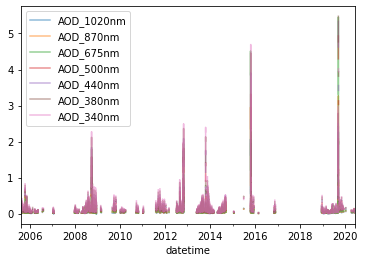

In [9]:
data.plot("datetime", aod_list, alpha=0.5);

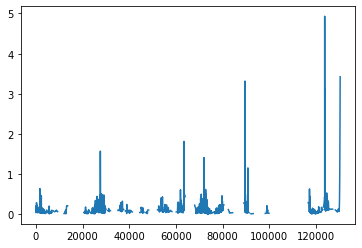

In [10]:
# interpolation method I settled on (subject to change). Try messing around with this, 
# lots of methods available, most arent appropriate
data["AOD_500nm"].interpolate(method='pchip', limit=500, limit_direction='both').plot();

In [11]:
# now apply the interpolation scheme to all AOD sets
for key in aod_list:
    data[key] = data["AOD_500nm"].interpolate(method='pchip', limit=500, limit_direction='both')

In [13]:
# Blanket interpolate all data using the same scheme (this is a bad idea)
data_interp = data.interpolate(method='linear')#.dropna()
data_interp.plot()

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear

In [ ]:
# after we finish messing about with interpolations, drop all rows that still have missing data
data_complete = data.dropna()
data_complete

## Part 2: Try PCA 

In [ ]:
data = data_complete.drop("datetime", axis=1)
data = data_interp#.drop("datetime", axis=1)

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

In [ ]:
#plot fraction of variance explained by each mode
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [ ]:
plt.plot(PCs[...,:4]);

This works about as we expect, the vast majority is explained by the first few modes. Now, what are the biggest contributors to these modes?

## Stepwise Linear Regression

Perform stepwise linear regression on the PCs to create a predictive model with inputs

**PCs $\rightarrow$ CO2 Fluxes**

or, if we do rotated PCA:

**smoke, PCs $\rightarrow$ CO2 Fluxes**

In [ ]:
# assign predictors and predictands
X = pd.DataFrame(PCs)
Y = data["FC"]

print(X.shape)
print(Y.shape)
# do stepwise regression
#result = stepwise_selection(X, Y)

#print('resulting features:')
#print(result)

In [ ]:
plt.plot(eigvecs[0], label=data.columns[0])
plt.legend()

## To Do

- Interpolate all columns, eyeball-optimizing between coverage and faithful interpolated values
- Figure out how to represent smoke as input and CO2 flux data as output
- Try it again with rotated PCA
- Write up the presentation


- find characteristic patterns after grouping by smoke level?